## Exploration of variable time steps in the simulation of the 2 coupled reactions:
### `2 S <-> U` and `S <-> X`   
Both mostly forward.  1st-order kinetics throughout.   

Based on the reactions and initial conditions of the experiment `up_regulate_3`

This experiment gets repeated, with very fine _fixed_ steps (as a proxy for the "exact value"), in `variable_steps_2`

LAST REVISED: June 23, 2024 (using v. 1.0 beta36)

![Adaptive time steps](../../docs/variable_steps.png)

In [1]:
import set_path      # Importing this module will add the project's home directory to sys.path

Added 'D:\Docs\- MY CODE\BioSimulations\life123-Win7' to sys.path


In [2]:
from experiments.get_notebook_info import get_notebook_basename

from life123 import ChemData as chem
from life123 import UniformCompartment

import numpy as np
from life123 import GraphicLog

In [3]:
# Initialize the HTML logging
log_file = get_notebook_basename() + ".log.htm"    # Use the notebook base filename for the log file

# Set up the use of some specified graphic (Vue) components
GraphicLog.config(filename=log_file,
                  components=["vue_cytoscape_2"],
                  extra_js="https://cdnjs.cloudflare.com/ajax/libs/cytoscape/3.21.2/cytoscape.umd.js")

-> Output will be LOGGED into the file 'variable_steps_1.log.htm'


### Initialize the system

In [4]:
# Initialize the system
chem_data = chem(names=["U", "X", "S"])

# Reaction 2 S <-> U , with 1st-order kinetics for all species (mostly forward)
chem_data.add_reaction(reactants=[(2, "S", 1)], products="U",
                       forward_rate=8., reverse_rate=2.)

# Reaction S <-> X , with 1st-order kinetics for all species (mostly forward)
chem_data.add_reaction(reactants="S", products="X",
                       forward_rate=6., reverse_rate=3.)

chem_data.describe_reactions()

# Send the plot of the reaction network to the HTML log file
chem_data.plot_reaction_network("vue_cytoscape_2")

Number of reactions: 2 (at temp. 25 C)
0: 2 S <-> U  (kF = 8 / kR = 2 / delta_G = -3,436.6 / K = 4) | 1st order in all reactants & products
1: S <-> X  (kF = 6 / kR = 3 / delta_G = -1,718.3 / K = 2) | 1st order in all reactants & products
Set of chemicals involved in the above reactions: {'S', 'U', 'X'}
[GRAPHIC ELEMENT SENT TO LOG FILE `variable_steps_1.log.htm`]


### Set the initial concentrations of all the chemicals

In [5]:
dynamics = UniformCompartment(chem_data=chem_data, preset=None)
dynamics.set_conc(conc={"U": 50., "X": 100.})
dynamics.describe_state()

SYSTEM STATE at Time t = 0:
3 species:
  Species 0 (U). Conc: 50.0
  Species 1 (X). Conc: 100.0
  Species 2 (S). Conc: 0.0
Set of chemicals involved in reactions: {'S', 'U', 'X'}


In [6]:
dynamics.set_diagnostics()       # To save diagnostic information about the call to single_compartment_react()

# All of these settings are typically managed by a preset... but set explitly here for demonstration of low-level control
# Here we're setting just "norm_A" (a measure of concentration changes across a single step), but typically multiple norms are used
dynamics.set_thresholds(norm="norm_A", low=0.25, high=0.64, abort=1.44)
dynamics.set_step_factors(upshift=2.0, downshift=0.5, abort=0.5, error=0.5)    # Note: upshift=2.0 seems to often be excessive; smaller values are recommented

dynamics.show_adaptive_parameters()

Parameters used for the automated adaptive time step sizes -
    THRESHOLDS:  [{'norm': 'norm_A', 'low': 0.25, 'high': 0.64, 'abort': 1.44}]
    STEP FACTORS:  {'upshift': 2.0, 'downshift': 0.5, 'abort': 0.5, 'error': 0.5}


In [7]:
dynamics.single_compartment_react(initial_step=0.01, target_end_time=2.0, 
                                  variable_steps=True, explain_variable_steps=[0, 0.5])  # Detailed printout for the early steps


(STEP 0 aborted) SYSTEM TIME 0 : Examining Conc. changes due to tentative Δt=0.01 ...
    Previous:  None
    Baseline:  [ 50. 100.   0.]
    Deltas:    [-1. -3.  5.]
    Norms:     {'norm_A': 3.888888888888889}
    Thresholds:    
                   norm_A : low 0.25 | high 0.64 | abort 1.44 | (VALUE 3.8889)
    Step Factors:     {'upshift': 2.0, 'downshift': 0.5, 'abort': 0.5, 'error': 0.5}
    => Action: 'ABORT'  (with step size factor of 0.5)
       * INFO: the tentative time step (0.01) leads to a value of ['norm_A'] > its ABORT threshold:
       -> will backtrack, and re-do step with a SMALLER Δt, x0.5 (now set to 0.005) [Step started at t=0, and will rewind there]

(STEP 0 completed) SYSTEM TIME 0 : Examining Conc. changes due to tentative Δt=0.005 ...
    Previous:  None
    Baseline:  [ 50. 100.   0.]
    Deltas:    [-0.5 -1.5  2.5]
    Norms:     {'norm_A': 0.9722222222222222}
    Thresholds:    
                   norm_A : low 0.25 | high 0.64 | (VALUE 0.97222) | abort 1.44

In [8]:
dynamics.get_history()

SYSTEM TIME          U           X          S            caption
0        0.0000  50.000000  100.000000   0.000000  Initialized state
1        0.0050  49.500000   98.500000   2.500000                   
2        0.0075  49.302500   97.798750   3.596250                   
3        0.0125  48.953325   96.439656   5.653694                   
4        0.0150  48.821632   95.801164   6.555571                   
5        0.0200  48.595639   94.560814   8.247909                   
6        0.0250  48.439599   93.389839   9.730964                   
7        0.0300  48.344441   92.280920  11.030197                   
8        0.0350  48.302205   91.227612  12.167978                   
9        0.0400  48.305902   90.224238  13.163959                   
10       0.0500  48.392901   88.307348  14.906851                   
11       0.0550  48.505246   87.429943  15.559566                   
12       0.0650  48.779906   85.740619  16.699569                   
13       0.0750  49.140273   84.170374  17.549079                   
14       0.0850  49.561394   82.698208  18.179004                   
15       0.0950  50.024487   81.308002  18.643025                   
16       0.1050  50.515439   79.987343  18.981779                   
17       0.1250  51.531906   77.465916  19.470272                   
18       0.1350  52.058890   76.310155  19.572066                   
19       0.1550  53.108064   74.080194  19.703677                   
20       0.1650  53.622197   73.040009  19.715597                   
21       0.1850  54.631805   71.023480  19.712910                   
22       0.2050  55.600598   69.127620  19.671183                   
23       0.2250  56.523964   67.340505  19.611568                   
24       0.2450  57.400856   65.653463  19.544825                   
25       0.2650  58.231994   64.059634  19.476378                   
26       0.2850  59.018935   62.553221  19.408909                   
27       0.3050  59.763603   61.129097  19.343697                   
28       0.3250  60.468050   59.782595  19.281305                   
29       0.3450  61.134337   58.509396  19.221930                   
30       0.3850  62.394608   56.101532  19.109253                   
31       0.4050  62.956304   55.028550  19.058842                   
32       0.4450  64.018629   52.999246  18.963496                   
33       0.4850  64.965457   51.190576  18.878510                   
34       0.5250  65.809344   49.578549  18.802763                   
35       0.5650  66.561481   48.141786  18.735252                   
36       0.6050  67.231843   46.861232  18.675082                   
37       0.6850  68.426800   44.578576  18.567824                   
38       0.7250  68.894360   43.685424  18.525856                   
39       0.8050  69.727810   42.093333  18.451046                   
40       0.8850  70.380030   40.847436  18.392504                   
41       1.0450  71.400826   38.897470  18.300879                   
42       1.2050  71.977686   37.795528  18.249100                   
43       1.5250  72.629663   36.550094  18.190579                   
44       2.1650  72.799461   36.225739  18.175339

In [9]:
(transition_times, step_sizes) = dynamics.explain_time_advance(return_times=True)

From time 0 to 0.005, in 1 step of 0.005
From time 0.005 to 0.0075, in 1 step of 0.0025
From time 0.0075 to 0.0125, in 1 step of 0.005
From time 0.0125 to 0.015, in 1 step of 0.0025
From time 0.015 to 0.04, in 5 steps of 0.005
From time 0.04 to 0.05, in 1 step of 0.01
From time 0.05 to 0.055, in 1 step of 0.005
From time 0.055 to 0.105, in 5 steps of 0.01
From time 0.105 to 0.125, in 1 step of 0.02
From time 0.125 to 0.135, in 1 step of 0.01
From time 0.135 to 0.155, in 1 step of 0.02
From time 0.155 to 0.165, in 1 step of 0.01
From time 0.165 to 0.345, in 9 steps of 0.02
From time 0.345 to 0.385, in 1 step of 0.04
From time 0.385 to 0.405, in 1 step of 0.02
From time 0.405 to 0.605, in 5 steps of 0.04
From time 0.605 to 0.685, in 1 step of 0.08
From time 0.685 to 0.725, in 1 step of 0.04
From time 0.725 to 0.885, in 2 steps of 0.08
From time 0.885 to 1.205, in 2 steps of 0.16
From time 1.205 to 1.525, in 1 step of 0.32
From time 1.525 to 2.165, in 1 step of 0.64
(44 steps total)


In [10]:
np.array(step_sizes)

array([0.005 , 0.0025, 0.005 , 0.0025, 0.005 , 0.01  , 0.005 , 0.01  ,
       0.02  , 0.01  , 0.02  , 0.01  , 0.02  , 0.04  , 0.02  , 0.04  ,
       0.08  , 0.04  , 0.08  , 0.16  , 0.32  , 0.64  ])

In [11]:
np.array(transition_times)    # Note: there will be 1 more transition time (the end time) than step sizes

array([0.    , 0.005 , 0.0075, 0.0125, 0.015 , 0.04  , 0.05  , 0.055 ,
       0.105 , 0.125 , 0.135 , 0.155 , 0.165 , 0.345 , 0.385 , 0.405 ,
       0.605 , 0.685 , 0.725 , 0.885 , 1.205 , 1.525 , 2.165 ])

## Plots of changes of concentration with time

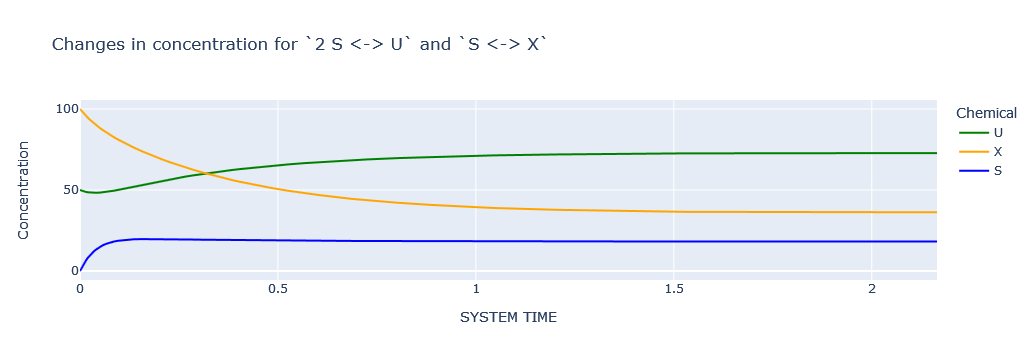

In [12]:
dynamics.plot_history(colors=['green', 'orange', 'blue'])

In [13]:
dynamics.curve_intersect("U", "X", t_start=0.3, t_end=0.35)  # Compare with the value from experiment "variable_steps_2"

(0.3183157284824908, 60.23261431038145)

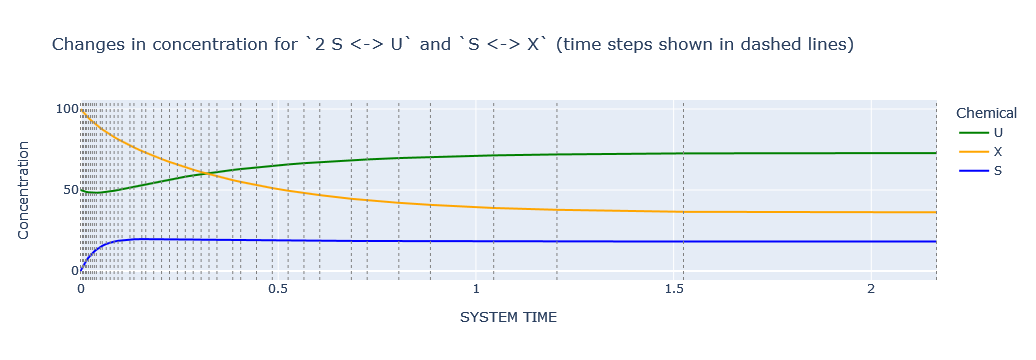

In [14]:
dynamics.plot_history(colors=['green', 'orange', 'blue'], show_intervals=True)

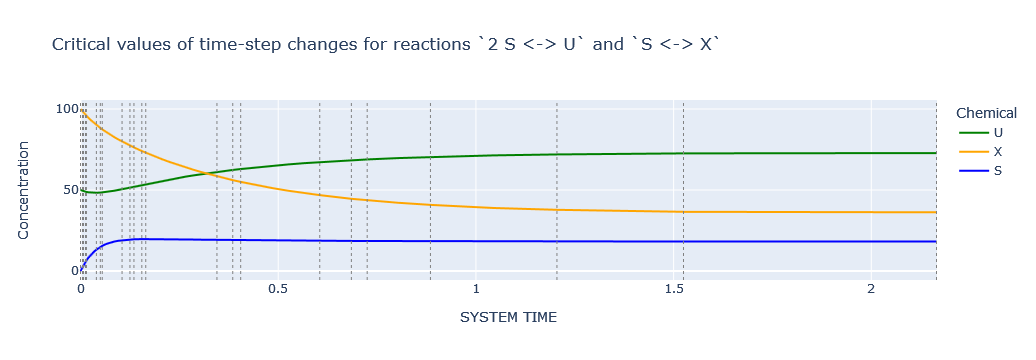

In [15]:
# Show the "critical values", i.e. times when the step size changes
dynamics.plot_history(colors=['green', 'orange', 'blue'], vertical_lines=transition_times,
                      title="Critical values of time-step changes for reactions `2 S <-> U` and `S <-> X`")

## Note: the dashed lines in the plot immediatly above are NOT the steps; they are the "critical values", i.e. times when the step size changes.   
The time steps were shown in an earlier plots

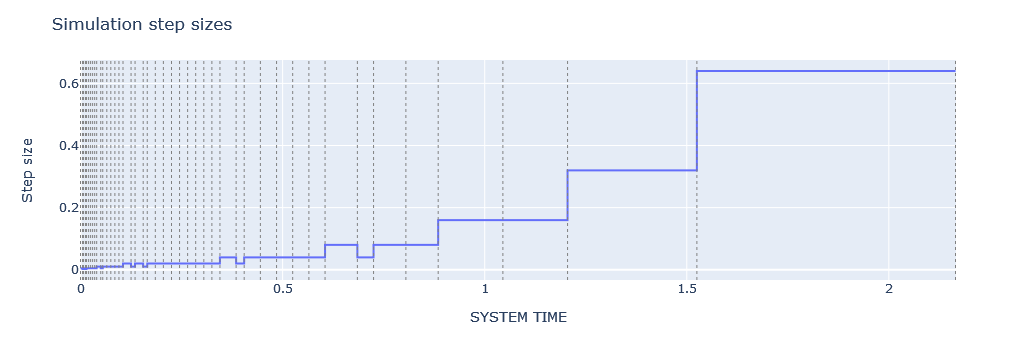

In [16]:
dynamics.plot_step_sizes(show_intervals=True)

In [17]:
dynamics.is_in_equilibrium()

0: 2 S <-> U
Final concentrations: [S] = 18.18 ; [U] = 72.8
1. Ratio of reactant/product concentrations, adjusted for reaction orders: 4.0054
    Formula used:  [U] / [S]
2. Ratio of forward/reverse reaction rates: 4
Discrepancy between the two values: 0.1349 %
Reaction IS in equilibrium (within 1% tolerance)

1: S <-> X
Final concentrations: [S] = 18.18 ; [X] = 36.23
1. Ratio of reactant/product concentrations, adjusted for reaction orders: 1.99313
    Formula used:  [X] / [S]
2. Ratio of forward/reverse reaction rates: 2
Discrepancy between the two values: 0.3437 %
Reaction IS in equilibrium (within 1% tolerance)



True

In [18]:
dynamics.get_diagnostic_rxn_data(rxn_index=0)

Reaction:  2 S <-> U


START_TIME   Delta U  Delta X   Delta S  time_step  \
0       0.0000 -1.000000      0.0  2.000000     0.0100   
1       0.0000 -0.500000      0.0  1.000000     0.0050   
2       0.0050 -0.197500      0.0  0.395000     0.0025   
3       0.0075 -0.349175      0.0  0.698350     0.0050   
4       0.0125 -0.131693      0.0  0.263385     0.0025   
5       0.0150 -0.225993      0.0  0.451987     0.0050   
6       0.0200 -0.156040      0.0  0.312080     0.0050   
7       0.0250 -0.095157      0.0  0.190315     0.0050   
8       0.0300 -0.042237      0.0  0.084473     0.0050   
9       0.0350  0.003697      0.0 -0.007394     0.0050   
10      0.0400  0.086999      0.0 -0.173997     0.0100   
11      0.0500  0.112345      0.0 -0.224690     0.0050   
12      0.0550  0.274660      0.0 -0.549321     0.0100   
13      0.0650  0.360367      0.0 -0.720735     0.0100   
14      0.0750  0.421121      0.0 -0.842242     0.0100   
15      0.0850  0.463092      0.0 -0.926185     0.0100   
16      0.0950  0.490952      0.0 -0.981905     0.0100   
17      0.1050  1.016467      0.0 -2.032934     0.0200   
18      0.1250  0.526984      0.0 -1.053967     0.0100   
19      0.1350  1.049175      0.0 -2.098350     0.0200   
20      0.1550  0.514133      0.0 -1.028266     0.0100   
21      0.1650  1.009608      0.0 -2.019215     0.0200   
22      0.1850  0.968793      0.0 -1.937587     0.0200   
23      0.2050  0.923365      0.0 -1.846731     0.0200   
24      0.2250  0.876892      0.0 -1.753785     0.0200   
25      0.2450  0.831138      0.0 -1.662276     0.0200   
26      0.2650  0.786941      0.0 -1.573882     0.0200   
27      0.2850  0.744668      0.0 -1.489336     0.0200   
28      0.3050  0.704447      0.0 -1.408895     0.0200   
29      0.3250  0.666287      0.0 -1.332573     0.0200   
30      0.3450  1.260271      0.0 -2.520541     0.0400   
31      0.3850  0.561696      0.0 -1.123392     0.0200   
32      0.4050  1.062325      0.0 -2.124650     0.0400   
33      0.4450  0.946828      0.0 -1.893657     0.0400   
34      0.4850  0.843887      0.0 -1.687773     0.0400   
35      0.5250  0.752137      0.0 -1.504274     0.0400   
36      0.5650  0.670362      0.0 -1.340725     0.0400   
37      0.6050  1.194957      0.0 -2.389915     0.0800   
38      0.6850  0.467560      0.0 -0.935119     0.0400   
39      0.7250  0.833450      0.0 -1.666901     0.0800   
40      0.8050  0.652220      0.0 -1.304440     0.0800   
41      0.8850  1.020795      0.0 -2.041591     0.1600   
42      1.0450  0.576860      0.0 -1.153721     0.1600   
43      1.2050  0.651978      0.0 -1.303955     0.3200   
44      1.5250  0.169798      0.0 -0.339595     0.6400   

                             caption  
0   aborted: excessive norm value(s)  
1                                     
2                                     
3                                     
4                                     
5                                     
6                                     
7                                     
8                                     
9                                     
10                                    
11                                    
12                                    
13                                    
14                                    
15                                    
16                                    
17                                    
18                                    
19                                    
20                                    
21                                    
22                                    
23                                    
24                                    
25                                    
26                                    
27                                    
28                                    
29                                    
30                                    
31                                    
32                                    
33       

In [19]:
dynamics.get_diagnostic_rxn_data(rxn_index=1)

Reaction:  S <-> X


START_TIME  Delta U   Delta X   Delta S  time_step  \
0       0.0000      0.0 -3.000000  3.000000     0.0100   
1       0.0000      0.0 -1.500000  1.500000     0.0050   
2       0.0050      0.0 -0.701250  0.701250     0.0025   
3       0.0075      0.0 -1.359094  1.359094     0.0050   
4       0.0125      0.0 -0.638492  0.638492     0.0025   
5       0.0150      0.0 -1.240350  1.240350     0.0050   
6       0.0200      0.0 -1.170975  1.170975     0.0050   
7       0.0250      0.0 -1.108919  1.108919     0.0050   
8       0.0300      0.0 -1.053308  1.053308     0.0050   
9       0.0350      0.0 -1.003375  1.003375     0.0050   
10      0.0400      0.0 -1.916890  1.916890     0.0100   
11      0.0500      0.0 -0.877405  0.877405     0.0050   
12      0.0550      0.0 -1.689324  1.689324     0.0100   
13      0.0650      0.0 -1.570244  1.570244     0.0100   
14      0.0750      0.0 -1.472167  1.472167     0.0100   
15      0.0850      0.0 -1.390206  1.390206     0.0100   
16      0.0950      0.0 -1.320659  1.320659     0.0100   
17      0.1050      0.0 -2.521427  2.521427     0.0200   
18      0.1250      0.0 -1.155761  1.155761     0.0100   
19      0.1350      0.0 -2.229961  2.229961     0.0200   
20      0.1550      0.0 -1.040185  1.040185     0.0100   
21      0.1650      0.0 -2.016529  2.016529     0.0200   
22      0.1850      0.0 -1.895860  1.895860     0.0200   
23      0.2050      0.0 -1.787115  1.787115     0.0200   
24      0.2250      0.0 -1.687042  1.687042     0.0200   
25      0.2450      0.0 -1.593829  1.593829     0.0200   
26      0.2650      0.0 -1.506413  1.506413     0.0200   
27      0.2850      0.0 -1.424124  1.424124     0.0200   
28      0.3050      0.0 -1.346502  1.346502     0.0200   
29      0.3250      0.0 -1.273199  1.273199     0.0200   
30      0.3450      0.0 -2.407864  2.407864     0.0400   
31      0.3850      0.0 -1.072982  1.072982     0.0200   
32      0.4050      0.0 -2.029304  2.029304     0.0400   
33      0.4450      0.0 -1.808671  1.808671     0.0400   
34      0.4850      0.0 -1.612027  1.612027     0.0400   
35      0.5250      0.0 -1.436763  1.436763     0.0400   
36      0.5650      0.0 -1.280554  1.280554     0.0400   
37      0.6050      0.0 -2.282657  2.282657     0.0800   
38      0.6850      0.0 -0.893151  0.893151     0.0400   
39      0.7250      0.0 -1.592091  1.592091     0.0800   
40      0.8050      0.0 -1.245898  1.245898     0.0800   
41      0.8850      0.0 -1.949965  1.949965     0.1600   
42      1.0450      0.0 -1.101942  1.101942     0.1600   
43      1.2050      0.0 -1.245434  1.245434     0.3200   
44      1.5250      0.0 -0.324354  0.324354     0.6400   

                             caption  
0   aborted: excessive norm value(s)  
1                                     
2                                     
3                                     
4                                     
5                                     
6                                     
7                                     
8                                     
9                                     
10                                    
11                                    
12                                    
13                                    
14                                    
15                                    
16                                    
17                                    
18                                    
19                                    
20                                    
21                                    
22                                    
23                                    
24                                    
25                                    
26                                    
27                                    
28                                    
29                                    
30                                    
31                                    
32                                    
33       

In [20]:
dynamics.get_diagnostic_conc_data()

TIME          U           X          S caption
0   0.0000  50.000000  100.000000   0.000000        
1   0.0050  49.500000   98.500000   2.500000        
2   0.0075  49.302500   97.798750   3.596250        
3   0.0125  48.953325   96.439656   5.653694        
4   0.0150  48.821632   95.801164   6.555571        
5   0.0200  48.595639   94.560814   8.247909        
6   0.0250  48.439599   93.389839   9.730964        
7   0.0300  48.344441   92.280920  11.030197        
8   0.0350  48.302205   91.227612  12.167978        
9   0.0400  48.305902   90.224238  13.163959        
10  0.0500  48.392901   88.307348  14.906851        
11  0.0550  48.505246   87.429943  15.559566        
12  0.0650  48.779906   85.740619  16.699569        
13  0.0750  49.140273   84.170374  17.549079        
14  0.0850  49.561394   82.698208  18.179004        
15  0.0950  50.024487   81.308002  18.643025        
16  0.1050  50.515439   79.987343  18.981779        
17  0.1250  51.531906   77.465916  19.470272        
18  0.1350  52.058890   76.310155  19.572066        
19  0.1550  53.108064   74.080194  19.703677        
20  0.1650  53.622197   73.040009  19.715597        
21  0.1850  54.631805   71.023480  19.712910        
22  0.2050  55.600598   69.127620  19.671183        
23  0.2250  56.523964   67.340505  19.611568        
24  0.2450  57.400856   65.653463  19.544825        
25  0.2650  58.231994   64.059634  19.476378        
26  0.2850  59.018935   62.553221  19.408909        
27  0.3050  59.763603   61.129097  19.343697        
28  0.3250  60.468050   59.782595  19.281305        
29  0.3450  61.134337   58.509396  19.221930        
30  0.3850  62.394608   56.101532  19.109253        
31  0.4050  62.956304   55.028550  19.058842        
32  0.4450  64.018629   52.999246  18.963496        
33  0.4850  64.965457   51.190576  18.878510        
34  0.5250  65.809344   49.578549  18.802763        
35  0.5650  66.561481   48.141786  18.735252        
36  0.6050  67.231843   46.861232  18.675082        
37  0.6850  68.426800   44.578576  18.567824        
38  0.7250  68.894360   43.685424  18.525856        
39  0.8050  69.727810   42.093333  18.451046        
40  0.8850  70.380030   40.847436  18.392504        
41  1.0450  71.400826   38.897470  18.300879        
42  1.2050  71.977686   37.795528  18.249100        
43  1.5250  72.629663   36.550094  18.190579        
44  2.1650  72.799461   36.225739  18.175339

In [21]:
dynamics.get_diagnostic_decisions_data()

START_TIME   Delta U   Delta X   Delta S    norm_A norm_B     action  \
0       0.0000 -1.000000 -3.000000  5.000000  3.888889   None      ABORT   
1       0.0000 -0.500000 -1.500000  2.500000  0.972222   None  OK (high)   
2       0.0050 -0.197500 -0.701250  1.096250  0.192502   None   OK (low)   
3       0.0075 -0.349175 -1.359094  2.057444  0.689126   None  OK (high)   
4       0.0125 -0.131693 -0.638492  0.901878  0.137600   None   OK (low)   
5       0.0150 -0.225993 -1.240350  1.692337  0.494839   None  OK (stay)   
6       0.0200 -0.156040 -1.170975  1.483055  0.399443   None  OK (stay)   
7       0.0250 -0.095157 -1.108919  1.299234  0.325196   None  OK (stay)   
8       0.0300 -0.042237 -1.053308  1.137781  0.267310   None  OK (stay)   
9       0.0350  0.003697 -1.003375  0.995981  0.222084   None   OK (low)   
10      0.0400  0.086999 -1.916890  1.742892  0.746634   None  OK (high)   
11      0.0500  0.112345 -0.877405  0.652715  0.134277   None   OK (low)   
12      0.0550  0.274660 -1.689324  1.140004  0.469874   None  OK (stay)   
13      0.0650  0.360367 -1.570244  0.849510  0.368578   None  OK (stay)   
14      0.0750  0.421121 -1.472167  0.629925  0.304602   None  OK (stay)   
15      0.0850  0.463092 -1.390206  0.464021  0.262494   None  OK (stay)   
16      0.0950  0.490952 -1.320659  0.338754  0.233325   None   OK (low)   
17      0.1050  1.016467 -2.521427  0.488493  0.847714   None  OK (high)   
18      0.1250  0.526984 -1.155761  0.101794  0.180429   None   OK (low)   
19      0.1350  1.049175 -2.229961  0.131612  0.676758   None  OK (high)   
20      0.1550  0.514133 -1.040185  0.011919  0.149607   None   OK (low)   
21      0.1650  1.009608 -2.016529 -0.002686  0.565078   None  OK (stay)   
22      0.1850  0.968793 -1.895860 -0.041727  0.503843   None  OK (stay)   
23      0.2050  0.923365 -1.787115 -0.059615  0.449993   None  OK (stay)   
24      0.2250  0.876892 -1.687042 -0.066742  0.402167   None  OK (stay)   
25      0.2450  0.831138 -1.593829 -0.068447  0.359529   None  OK (stay)   
26      0.2650  0.786941 -1.506413 -0.067469  0.321456   None  OK (stay)   
27      0.2850  0.744668 -1.424124 -0.065212  0.287435   None  OK (stay)   
28      0.3050  0.704447 -1.346502 -0.062393  0.257023   None  OK (stay)   
29      0.3250  0.666287 -1.273199 -0.059374  0.229833   None   OK (low)   
30      0.3450  1.260271 -2.407864 -0.112677  0.822088   None  OK (high)   
31      0.3850  0.561696 -1.072982 -0.050411  0.163259   None   OK (low)   
32      0.4050  1.062325 -2.029304 -0.095347  0.583967   None  OK (stay)   
33      0.4450  0.946828 -1.808671 -0.084986  0.463888   None  OK (stay)   
34      0.4850  0.843887 -1.612027 -0.075746  0.368501   None  OK (stay)   
35      0.5250  0.752137 -1.436763 -0.067511  0.292728   None  OK (stay)   
36      0.5650  0.670362 -1.280554 -0.060171  0.232536   None   OK (low)   
37      0.6050  1.194957 -2.282657 -0.107258  0.738883   None  OK (high)   
38      0.6850  0.467560 -0.893151 -0.041968  0.113121   None   OK (low)   
39      0.7250  0.833450 -1.592091 -0.074810  0.359443   None  OK (stay)   
40      0.8050  0.652220 -1.245898 -0.058543  0.220120   None   OK (low)   
41      0.8850  1.020795 -1.949965 -0.091625  0.539198   None  OK (stay)   
42      1.0450  0.576860 -1.101942 -0.051778  0.172192   None   OK (low)   
43      1.2050  0.651978 -1.245434 -0.058521  0.219956   None   OK (low)   
44      1.5250  0.169798 -0.324354 -0.015241  0.014919   None   OK (low)   

    step_factor  time_step                  caption  
0           0.5     0.0100  excessive norm value(s)  
1           0.5     0.0050                           
2           2.0     0.0025                           
3           0.5     0.0050                           
4           2.0     0.0025                           
5           1.0     0.0050                           
6           1.0     0.0050                           
7           1.0     0.0050                           
8           1.0     0

#### Notice how the first step got aborted, and re-run, because of the large value of `norm_A`

In [22]:
dynamics.get_diagnostic_decisions_data_ALT()      # TODO: OBSOLETE!

START_TIME   Delta U   Delta X   Delta S
0       0.0000 -1.000000 -3.000000  5.000000
1       0.0000 -0.500000 -1.500000  2.500000
2       0.0050 -0.197500 -0.701250  1.096250
3       0.0075 -0.349175 -1.359094  2.057444
4       0.0125 -0.131693 -0.638492  0.901878
5       0.0150 -0.225993 -1.240350  1.692337
6       0.0200 -0.156040 -1.170975  1.483055
7       0.0250 -0.095157 -1.108919  1.299234
8       0.0300 -0.042237 -1.053308  1.137781
9       0.0350  0.003697 -1.003375  0.995981
10      0.0400  0.086999 -1.916890  1.742892
11      0.0500  0.112345 -0.877405  0.652715
12      0.0550  0.274660 -1.689324  1.140004
13      0.0650  0.360367 -1.570244  0.849510
14      0.0750  0.421121 -1.472167  0.629925
15      0.0850  0.463092 -1.390206  0.464021
16      0.0950  0.490952 -1.320659  0.338754
17      0.1050  1.016467 -2.521427  0.488493
18      0.1250  0.526984 -1.155761  0.101794
19      0.1350  1.049175 -2.229961  0.131612
20      0.1550  0.514133 -1.040185  0.011919
21      0.1650  1.009608 -2.016529 -0.002686
22      0.1850  0.968793 -1.895860 -0.041727
23      0.2050  0.923365 -1.787115 -0.059615
24      0.2250  0.876892 -1.687042 -0.066742
25      0.2450  0.831138 -1.593829 -0.068447
26      0.2650  0.786941 -1.506413 -0.067469
27      0.2850  0.744668 -1.424124 -0.065212
28      0.3050  0.704447 -1.346502 -0.062393
29      0.3250  0.666287 -1.273199 -0.059374
30      0.3450  1.260271 -2.407864 -0.112677
31      0.3850  0.561696 -1.072982 -0.050411
32      0.4050  1.062325 -2.029304 -0.095347
33      0.4450  0.946828 -1.808671 -0.084986
34      0.4850  0.843887 -1.612027 -0.075746
35      0.5250  0.752137 -1.436763 -0.067511
36      0.5650  0.670362 -1.280554 -0.060171
37      0.6050  1.194957 -2.282657 -0.107258
38      0.6850  0.467560 -0.893151 -0.041968
39      0.7250  0.833450 -1.592091 -0.074810
40      0.8050  0.652220 -1.245898 -0.058543
41      0.8850  1.020795 -1.949965 -0.091625
42      1.0450  0.576860 -1.101942 -0.051778
43      1.2050  0.651978 -1.245434 -0.058521
44      1.5250  0.169798 -0.324354 -0.015241